In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import iso3166

import plotly.graph_objs as go
import plotly.offline as py

# Meta-data

- Data about the sport and its participants but not necessarily a given game.
<br>
<br>
- Such data might concern rules, stadium capacities, physical characteristics of players, kit colors, team badges, sponsor information, tweets, etc.
<br>
<br>
- Can be independent from the sport itself.

##  Sports, Players, and Game Characteristics

- Meta-data plays an important role to convey a sport’s identity and rules.
<br>
<br>
- **Types of Visualization:**
    - Sport recognition.
    - Players and Teams Differentiation.
    - Game highlights.

## Players’ and Teams’ Performance

- Meta-data may augment sports data with details that are not captured by collected data and that can be used to create performance indicators.
<br>
<br>
- **Types of Visualization:**
    - Player performances.
    - Team tactics and affinities.
    - Expected performance.

    <div style="text-align:center"><img width="500px" src="./images/age_champion_grand_slam.png"/></div>
    <br>
    <br>
    <div style="text-align:center">Figure 1: Breakthrough champions are getting older. From Five Thirty Eight (Morris B., 2016).</div>

## Competition Structure

- Tournament trees describe competitions and are the second-most widely used competition structure behind rankings.
<br>
<br>
- **Types of Visualization:**
    - Visualizing the tree structure of tournaments.
    - Supporting tournament predictions.
    
    <div style="text-align:center"><img width="500px" src="./images/prediction_correcteness_tournament_bracket.png"/></div>
    <br>
    <br>
    <div style="text-align:center">Figure 2: AdaptiviTree for visualizing prediction correctness on top of a tournament bracket using colored bars (Tan D., Smith G., Lee B., Robertson G., 2007).</div>

# FIFA World Cup 2018 Tweets

Dataset: https://www.kaggle.com/rgupta09/world-cup-2018-tweets

Source: https://www.kaggle.com/siddharthaduggirala2/fifa-tweet-analysis

## Load Data

In [2]:
df1 = pd.read_csv('../datasets/world-cup-2018-tweets/FIFA.csv')
df1.head(5)

,ID,lang,Date,Source,len,Orig_Tweet,Tweet,Likes,RTs,Hashtags,UserMentionNames,UserMentionID,Name,Place,Followers,Friends
0,1013597060640145408,en,2018-07-02 01:35:45,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,Cayleb,Accra,861,828
1,1013597056219295744,en,2018-07-02 01:35:44,Twitter for Android,139,RT @FCBarcelona: ?? @ivanrakitic scores the wi...,scores the winning penalty to send into the qu...,0,1031,WorldCup,"FC Barcelona,Ivan Rakitic,HNS | CFF","FCBarcelona,ivanrakitic,HNS_CFF",Febri Aditya,Bogor,667,686
2,1013597047482544130,en,2018-07-02 01:35:42,Twitter for Android,107,RT @javierfernandez: Tonight we have big game....,Tonight we have big game,0,488,worldcup,"Javier Fernandez,Evgeni Plushenko","javierfernandez,EvgeniPlushenko",??,NaN,65,67
3,1013597044198391808,en,2018-07-02 01:35:41,Twitter Web Client,142,We get stronger\r\nTurn the music up now\r\nWe...,We get stronger Turn the music up now We got t...,0,0,"PowerByEXO,WorldCup,FIFAStadiumDJ,XiuminLeague","EXO,FIFA World Cup ?","weareoneEXO,FIFAWorldCup",Frida Carrillo,"Zapopan, Jalisco",17,89
4,1013597039999926272,en,2018-07-02 01:35:40,Twitter for Android,140,RT @Squawka: Only two goalkeepers have saved t...,Only two goalkeepers have saved three penaltie...,0,477,"WorldCup,POR,ENG",Squawka Football,Squawka,tar,NaN,137,216


## Clean & Preprocessing Data

In [3]:
df1['Tweet'].replace(' ', np.nan, inplace=True)
tweets = df1['Tweet'].dropna()
tweets.head()

0    Only two goalkeepers have saved three penaltie...
1    scores the winning penalty to send into the qu...
2                             Tonight we have big game
3    We get stronger Turn the music up now We got t...
4    Only two goalkeepers have saved three penaltie...
Name: Tweet, dtype: object

## Word Cloud of the tweets

An image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.

### Stemming

The process of reducing inflected (or sometimes derived) words to their word stem, base or root form — generally a written word form.

In [4]:
stemmer = PorterStemmer()

In [5]:
def stem_tokenize(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [6]:
def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokenize(tokens , stemmer)
    return ' '.join(stems)
#     return ' '.join(tokens)

In [7]:
corpus = []
np.random.seed(10)
idxs = list(np.random.randint(len(tweets), size=10000))

for item in tweets[idxs]:
    item = str(item).lower()
    tokens = tokenize(item)
    corpus.append(tokens)

In [8]:
corpus[:10]

['thi is what it look like when you get mob by celebr croatian player',
 'so um who els is miss the alreadi',
 'retweet if your countri are still in the russia uruguay franc croatia sweden brazil belgiu',
 'so if it wa not for that fluke goal in our first game we would be in the final now right that how it',
 'retweet if your countri are still in the russia uruguay franc croatia sweden brazil belgiu',
 'me everi time see mbapp run with the ball',
 'footbal will kill with laughter',
 'okay twitter what go to happen tonight',
 'well done england unforgett game one for the',
 'we will shortli discov who will be play in the quarter final here are your team for http']

### Join data for Word Cloud

In [9]:
comment_words = ''

for words in corpus:
    comment_words = comment_words + words + ' '

In [10]:
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(comment_words)

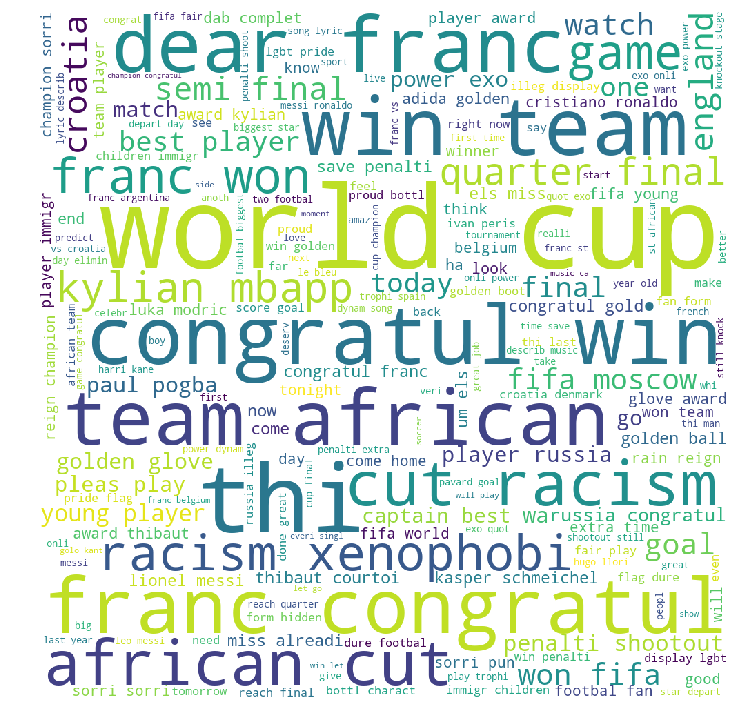

In [11]:
plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# English Premier League Players 2017/18

Dataset: https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset

Source: https://www.kaggle.com/aldemuro/premier-league-2017-2018-exploration

## Load Data

In [12]:
df2 = pd.read_csv('../datasets/english-premier-league-players-dataset-201718/epldata_final.csv')
df2.head(5)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


## Number of players in every club and position

Compute a simple cross-tabulation of two (or more) factors.

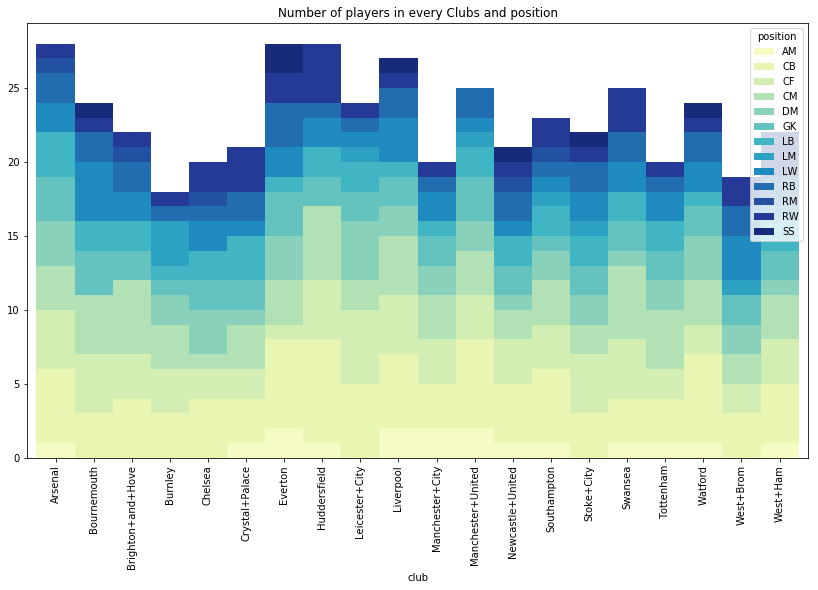

In [13]:
pd.crosstab(df2.club, df2.position).plot.bar(stacked=True, width=1,
                                          color=sns.color_palette('YlGnBu', 13))
fig=plt.gcf()
fig.set_size_inches(14, 8)
plt.title('Number of players in every Clubs and position')
plt.show()

### Order players position

In [14]:
print(df2.position.unique())

['LW' 'AM' 'GK' 'RW' 'CB' 'RB' 'CF' 'LB' 'DM' 'RM' 'CM' 'SS' 'LM']


<div style="text-align:center"><img width="500px" src="./images/soccer_positions.png"/></div>
<br>
<br>
<div style="text-align:center">Figure 3: Football players positions.</div>

In [15]:
columns = ['GK', 'CB', 'RB', 'LB', 'DM', 'CM', 'RM', 'LM', 'AM', 'RW', 'LW', 'SS', 'CF',]

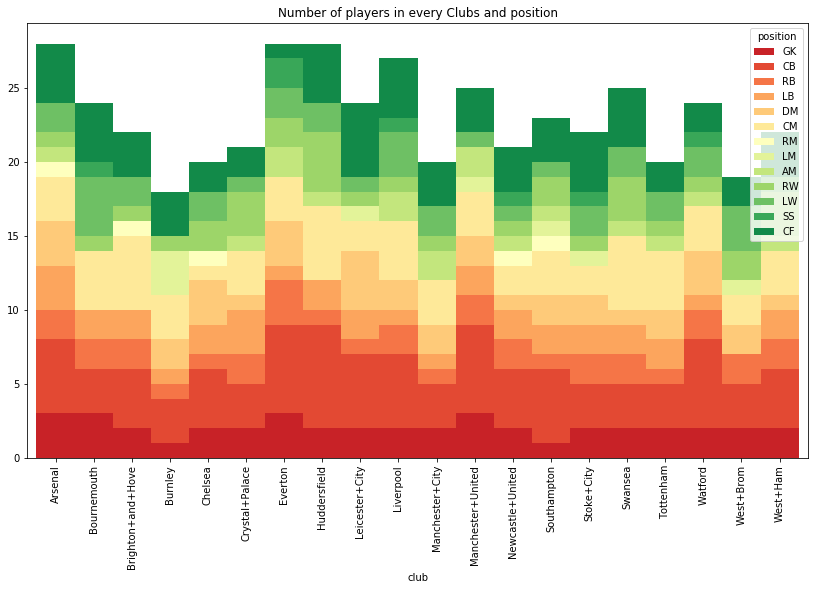

In [16]:
pd.crosstab(df2.club, df2.position)[columns].plot.bar(stacked=True, width=1,
                                             color=sns.color_palette('RdYlGn', 13))
fig=plt.gcf()
fig.set_size_inches(14, 8)
plt.title('Number of players in every Clubs and position')
plt.show()

## Geographical Spread of Market Value

In [17]:
full_countlist = pd.DataFrame(iso3166.countries_by_alpha3).T.reset_index()

In [18]:
countlist = full_countlist[[0, 2]]
countlist.columns = ['nationality', 'code']

In [19]:
df_mean_mv = pd.DataFrame(df2.groupby(['nationality']).apply(
                lambda g: g['market_value'].mean()))
df_mean_mv = pd.merge(df_mean_mv, countlist, on=['nationality', 'nationality'])
df_mean_mv.columns = ['nationality', 'market_value_average', 'code']
df_mean_mv.head()

,nationality,market_value_average,code
0,Algeria,22.333333,DZA
1,Argentina,12.779412,ARG
2,Armenia,35.000000,ARM
3,Australia,2.875000,AUS
4,Austria,4.750000,AUT


In [20]:
data = dict(type='choropleth',
            locations=df_mean_mv['code'],
            text=df_mean_mv['nationality'],
            z=df_mean_mv['market_value_average'],
            autocolorscale = True,
            reversescale = False,) 

layout = dict(
    title = 'Geographical distribution of market value average (Mill. €)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(type = 'mercator')),
    width=1000,
    height=1000)

In [21]:
py.init_notebook_mode(connected=True)
choromap = go.Figure(data=[data], layout=layout)
py.iplot(choromap, filename='d3' )

Done!